In [17]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import pandas as pd


In [18]:
img = np.zeros((200, 100), dtype=np.int32)


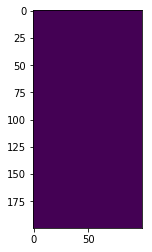

In [19]:
plt.imshow(img); plt.show()

In [20]:
img[:, :] = 255 *2 /3
img[50:-50, :] = 255/3
print(img.min())

85


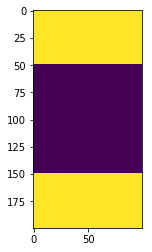

In [21]:
plt.imshow(img); plt.show()

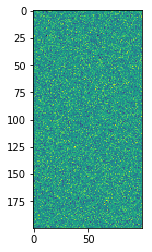

3.97982273374


In [22]:
noisy = np.random.randn(*img.shape)
plt.imshow(noisy); plt.show()
print(noisy.max())

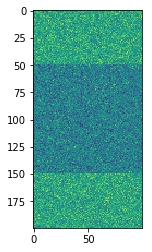

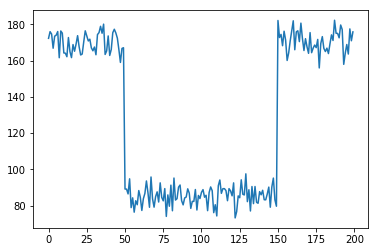

In [33]:
noisy_img = noisy * 60 + img
plt.imshow(noisy_img); plt.show()
plt.plot(noisy_img.mean(axis=1)); plt.show()

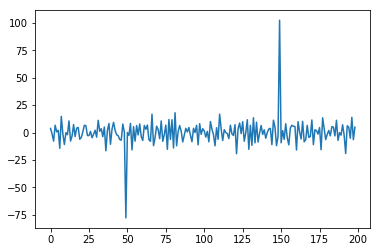

In [34]:
diff= np.diff(noisy_img.mean(axis=1))

plt.plot(diff); plt.show()

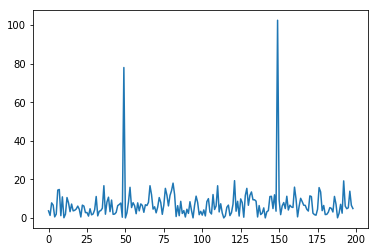

In [35]:
abs_diff = np.abs(diff)
plt.plot(abs_diff); plt.show()

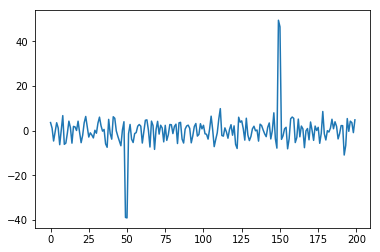

In [36]:
gradient = np.gradient(noisy_img.mean(axis=1))
plt.plot(gradient); plt.show()

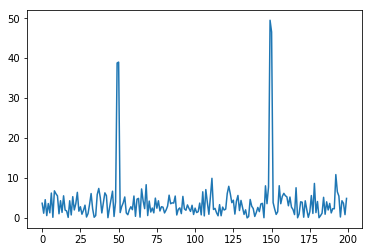

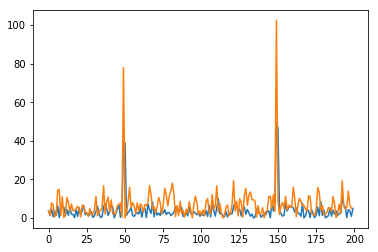

In [37]:
abs_grad = np.abs(gradient)
plt.plot(abs_grad); plt.show()

plt.plot(abs_grad)
plt.plot(abs_diff)
plt.show()

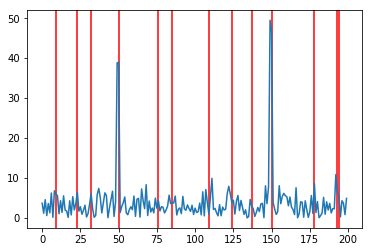

In [38]:
from scipy import signal
widths = np.arange(1, 10)
peaks  = signal.find_peaks_cwt(abs_grad, widths)
for peak in peaks:
    plt.axvline(peak, color='r')

plt.plot(abs_grad)
plt.show()

/Users/adammerchant/anaconda/envs/signal-processing/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


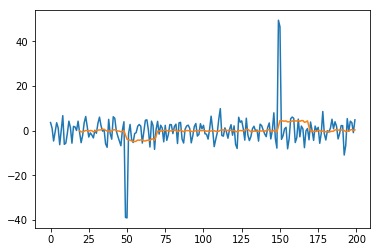

/Users/adammerchant/anaconda/envs/signal-processing/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


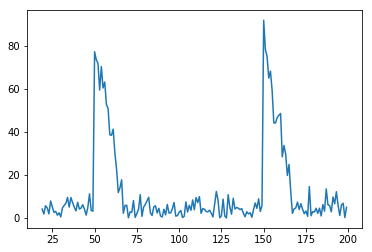

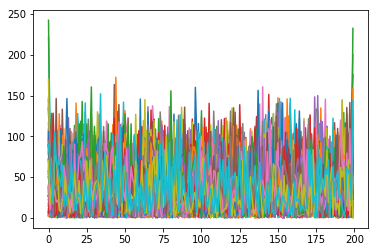

In [39]:
gradients = np.gradient(noisy_img, axis=0)
plt.plot(gradients.mean(axis=1))
plt.plot(pd.rolling_mean(gradients.mean(axis=1), 20))
plt.show()

plt.plot(np.abs(noisy_img.mean(axis=1) - pd.rolling_mean(noisy_img.mean(axis=1), 20))) ; plt.show()


abs_grads = np.abs(gradients)
plt.plot(abs_grads); plt.show()

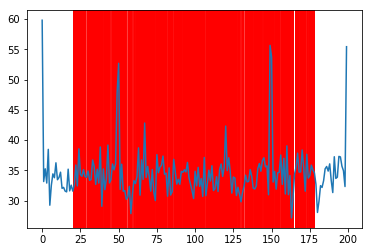

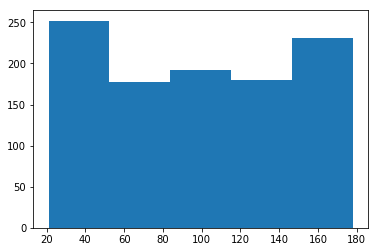

In [40]:
peaks = []
margin = 20
for col in abs_grads.T:
    col_peaks = signal.find_peaks_cwt(col[margin:-margin], widths).tolist()
    peaks.extend(col_peaks)

def plot_peaks(peaks):
    for peak in peaks:
        plt.axvline(peak, color='r')

peaks = np.array(peaks)
peaks += margin
plot_peaks(peaks)
plt.plot(abs_grads.mean(axis=1))
plt.show()
plt.hist(peaks, 5)
plt.show()
hist = np.histogram(peaks)

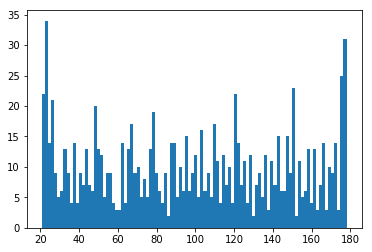

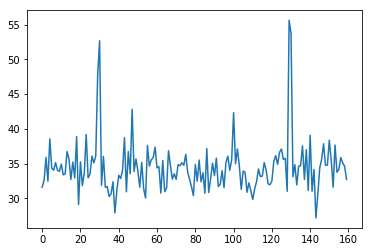

In [41]:
plt.hist(peaks[margin:-margin],100)
plt.show()
hist = np.histogram(peaks[margin:-margin])
plt.plot(abs_grads.mean(axis=1)[margin:-margin]); plt.show()

In [42]:
plt.plot(*hist)

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

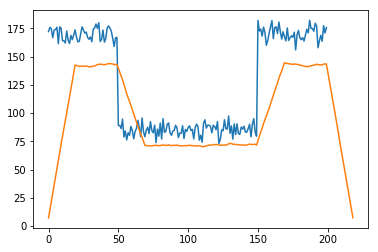

In [43]:
plt.plot(noisy_img.mean(axis=1))
n = 20
smoothed_noisy_img = signal.convolve(noisy_img, np.ones((n,n)))/n**2
plt.plot(smoothed_noisy_img.mean(axis=1))
plt.show()

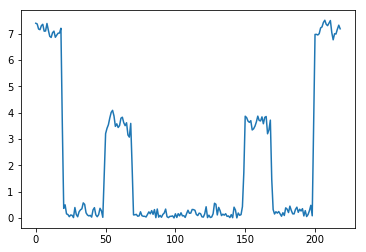

In [44]:
plt.plot(np.abs(np.gradient(smoothed_noisy_img, axis=0).mean(axis=1)))
plt.show()

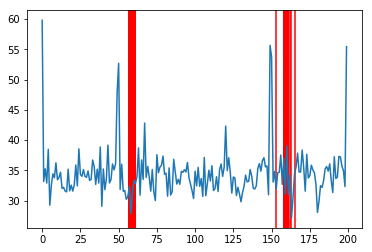

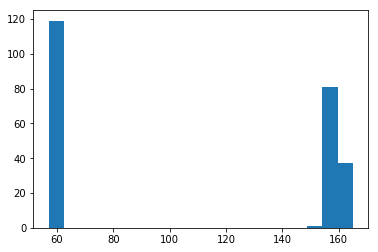

In [45]:
abs_smoothed_grads = np.abs(np.gradient(smoothed_noisy_img, axis=0))
peaks = []
margin = 20
for col in abs_smoothed_grads.T:
    col_peaks = signal.find_peaks_cwt(col[margin:-margin], [n]).tolist()
    peaks.extend(col_peaks)

def plot_peaks(peaks):
    for peak in peaks:
        plt.axvline(peak, color='r')

peaks = np.array(peaks)
peaks += margin
plot_peaks(peaks)
plt.plot(abs_grads.mean(axis=1))
plt.show()
plt.hist(peaks, 20)
plt.show()

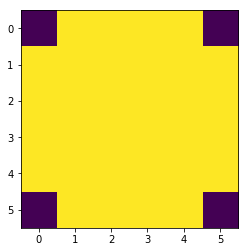

In [105]:

def build_circle_mask(radius):
    circle_arr = np.zeros((radius*2, radius*2), dtype=np.int32)
    
    for y, row in enumerate(circle_arr):
        for x, val in enumerate(row):
            if (x - radius + 0.5)**2 + (y - radius + 0.5)**2 <= (radius)**2:
                circle_arr[x,y] = 1
    return circle_arr
circle_rad = 3
circle = build_circle_mask(circle_rad)
plt.imshow(circle); plt.show()

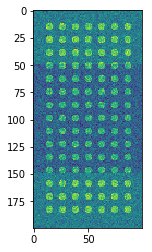

In [124]:
spotted_noisy_image = noisy_img.copy()
for y_idx, y in enumerate(range(circle_rad*4, spotted_noisy_image.shape[1]- circle_rad * 4, circle_rad * 4)):
    if y+circle_rad*2 > spotted_noisy_image.shape[1]:
        break
    for x_idx, x in enumerate(range(circle_rad*4, spotted_noisy_image.shape[0]-circle_rad*4, circle_rad *4)):
        if x+circle_rad*2 > spotted_noisy_image.shape[0]:
            break
        spotted_noisy_image[x:x+circle_rad*2, y:y+circle_rad*2] += circle * 255
#         try:
#             spotted_noisy_image[x:x+circle_rad*2, y:y+circle_rad*2] += circle * 255
#         except ValueError:
#             pass
plt.imshow(spotted_noisy_image); plt.show()

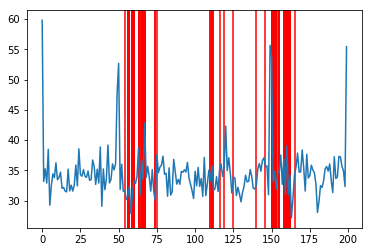

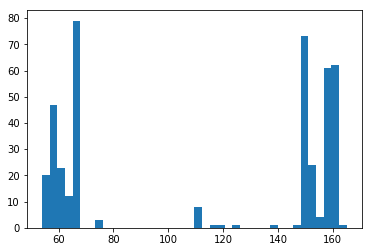

In [135]:
n = 20
smoothed_spotted_noisy_img = signal.convolve(spotted_noisy_image, np.ones((n,n)))/n**2
abs_smoothed_grads = np.abs(np.gradient(smoothed_spotted_noisy_img, axis=0))
peaks = []
margin = 20
for col in abs_smoothed_grads.T:
    col_peaks = signal.find_peaks_cwt(col[margin:-margin], [n*2]).tolist()
    peaks.extend(col_peaks)

def plot_peaks(peaks):
    for peak in peaks:
        plt.axvline(peak, color='r')

peaks = np.array(peaks)
peaks += margin
plot_peaks(peaks)
plt.plot(abs_grads.mean(axis=1))
plt.show()
plt.hist(peaks, 40)
plt.show()

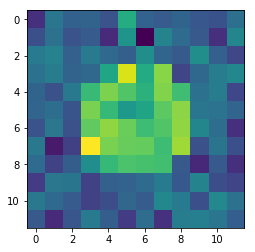

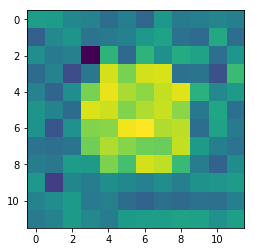

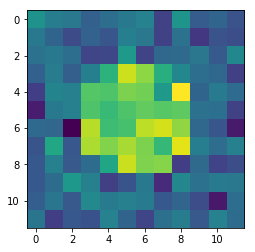

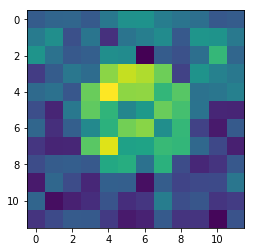

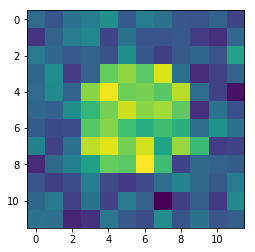

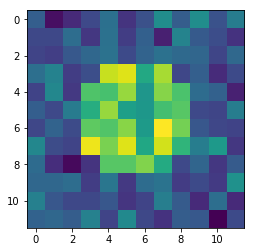

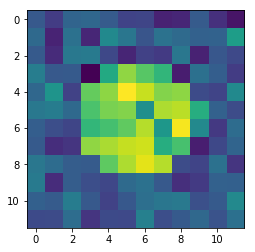

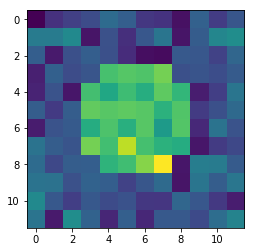

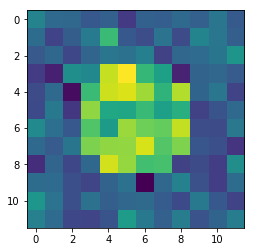

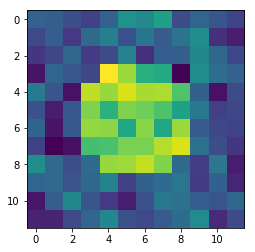

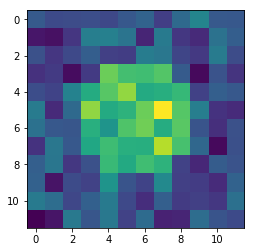

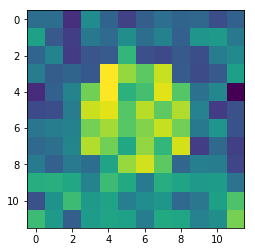

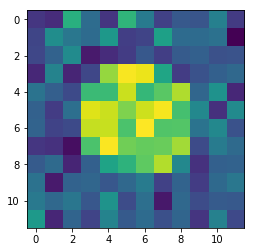

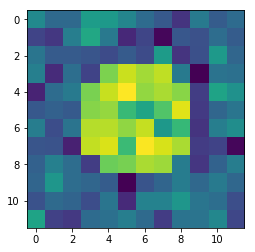

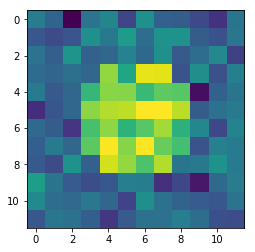

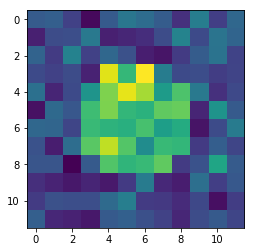

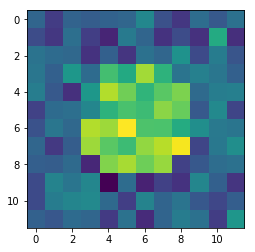

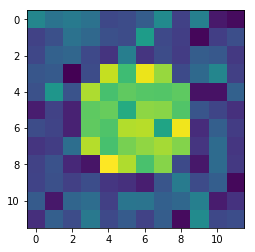

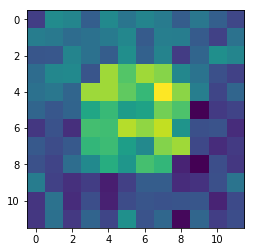

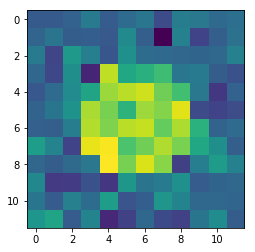

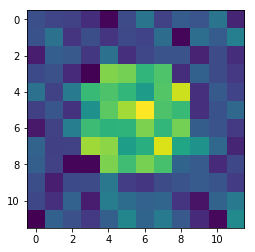

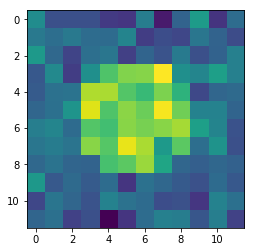

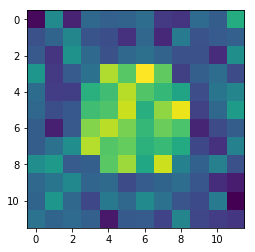

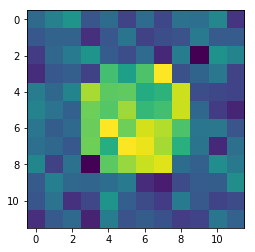

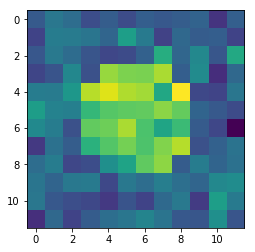

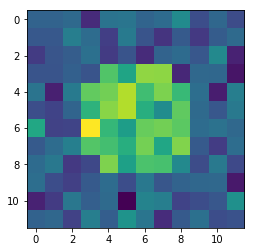

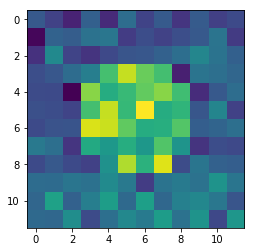

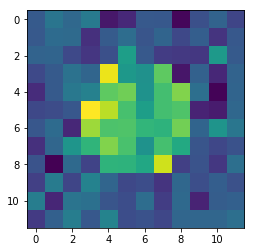

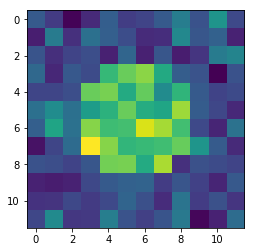

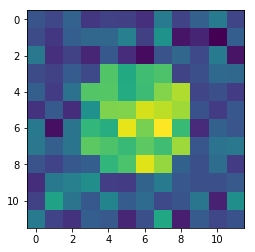

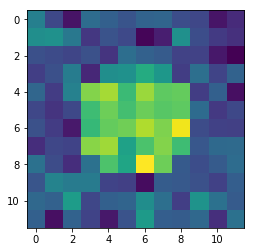

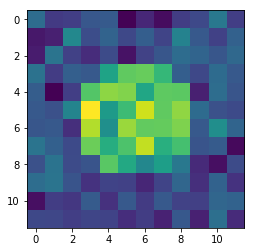

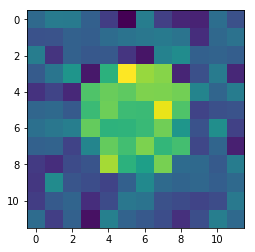

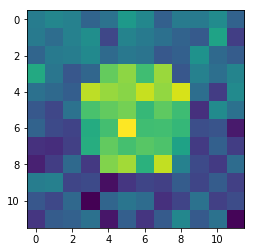

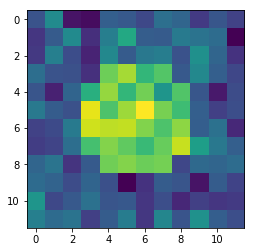

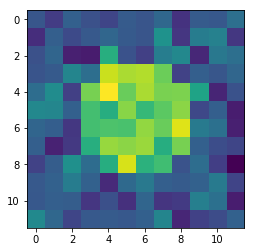

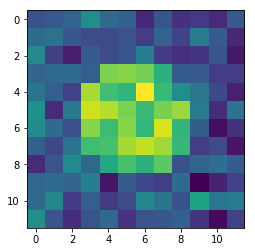

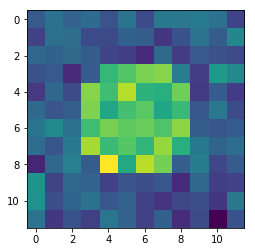

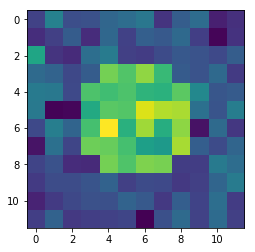

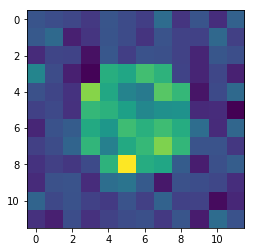

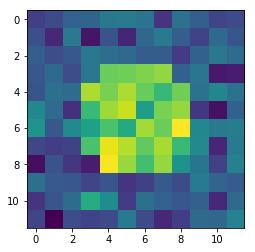

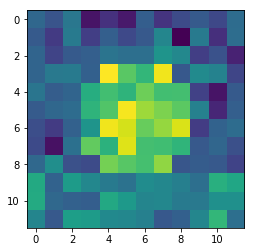

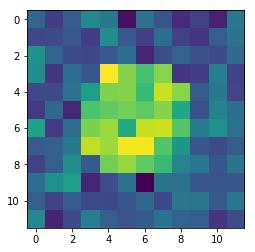

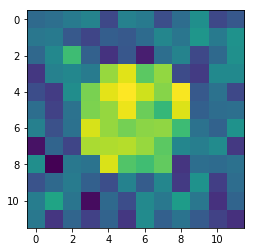

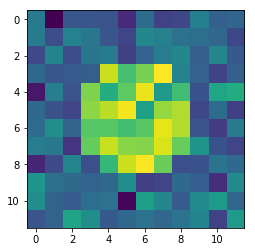

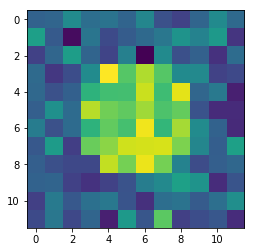

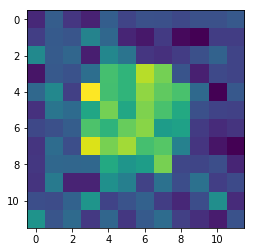

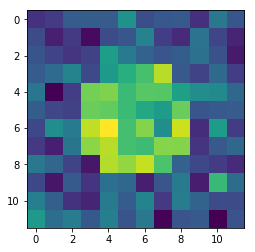

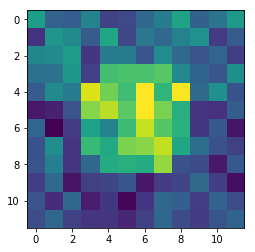

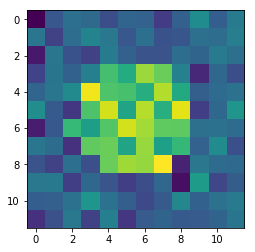

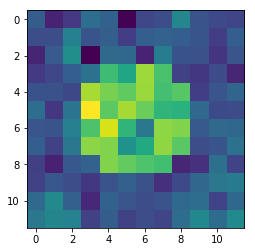

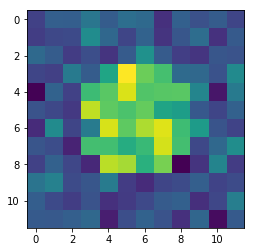

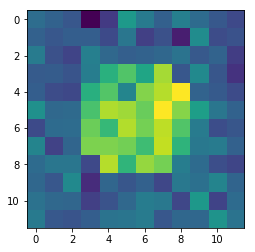

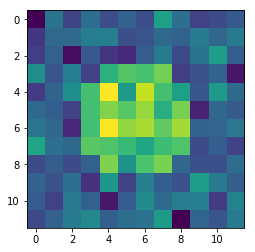

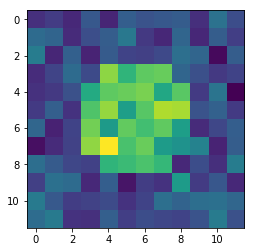

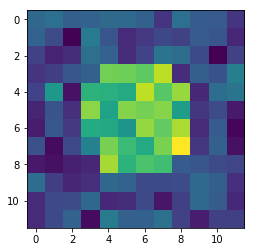

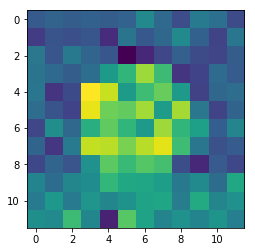

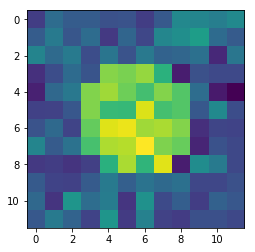

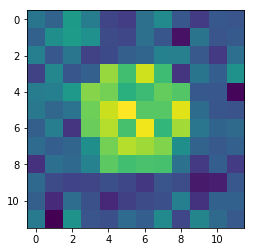

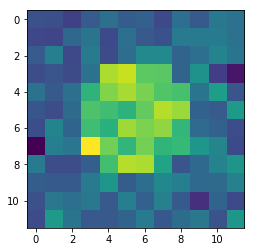

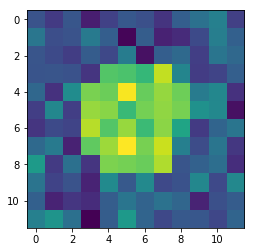

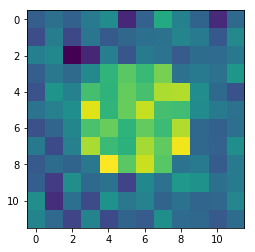

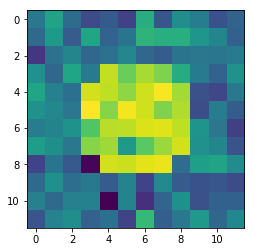

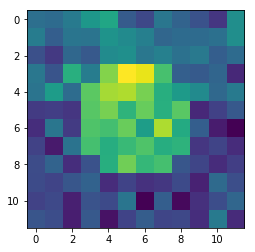

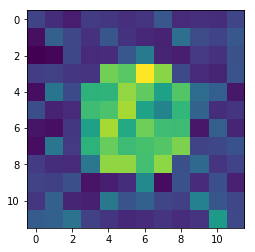

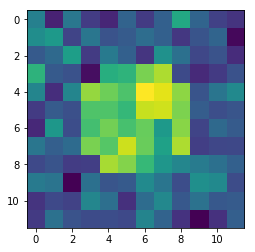

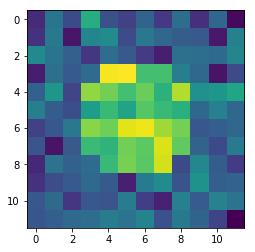

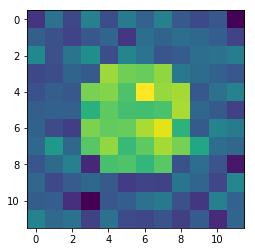

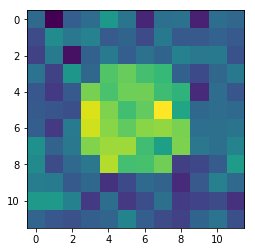

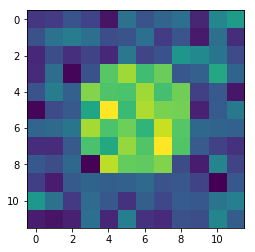

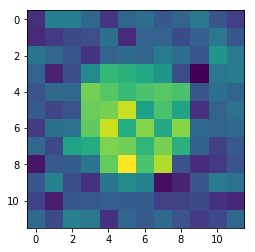

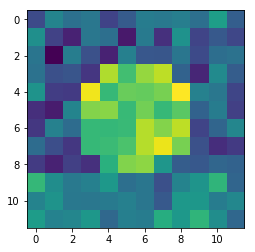

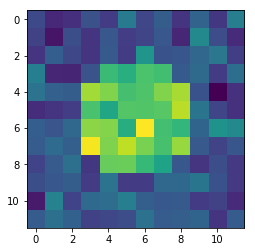

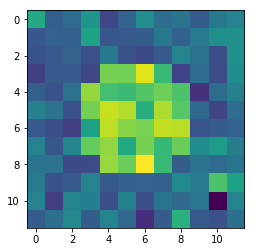

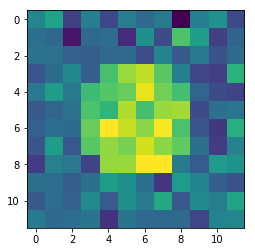

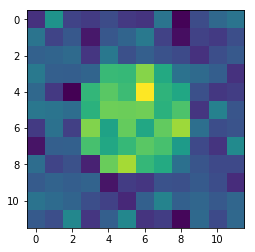

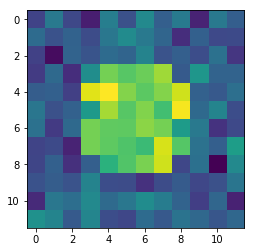

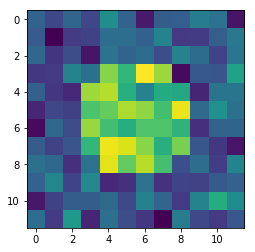

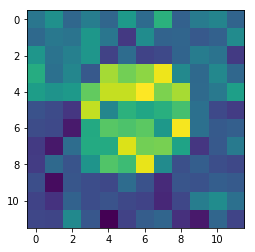

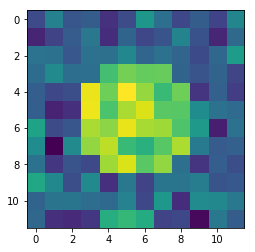

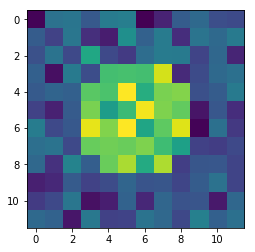

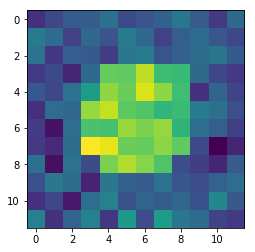

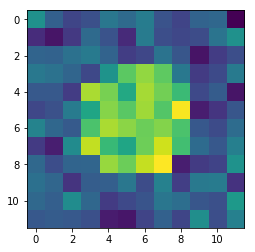

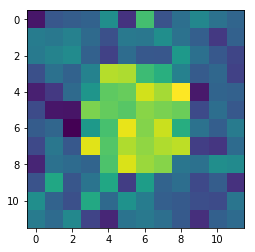

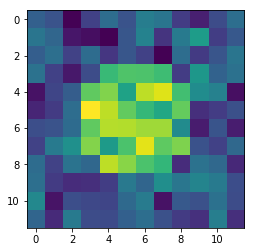

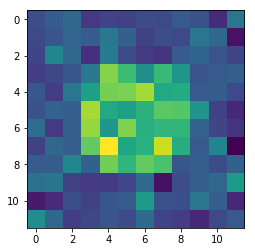

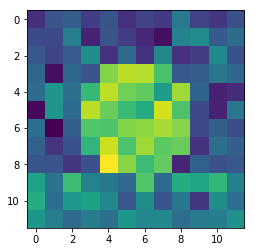

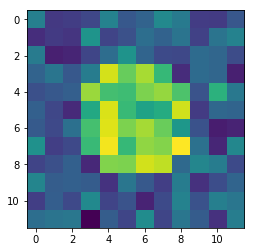

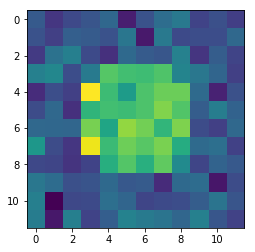

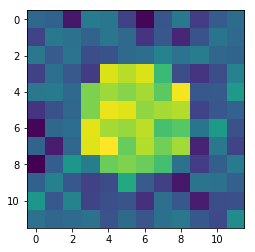

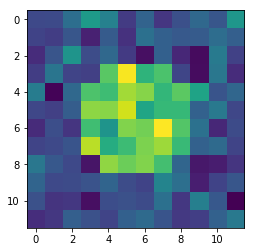

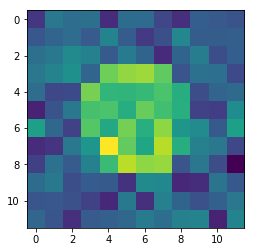

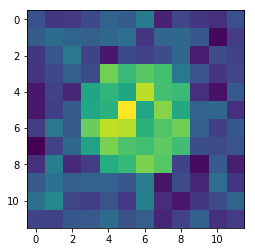

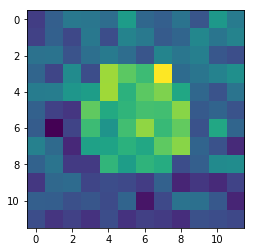

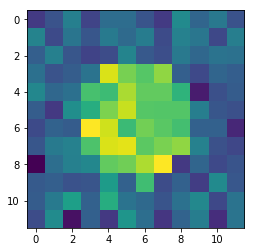

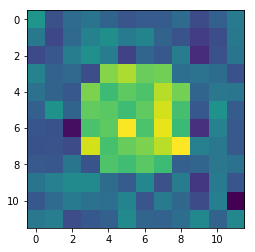

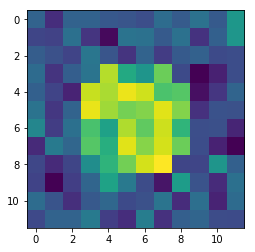

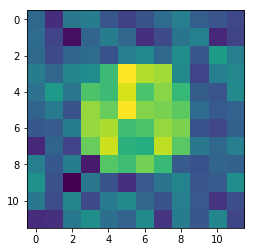

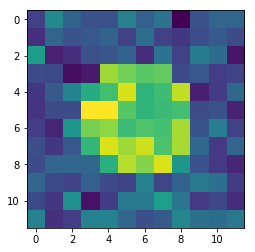

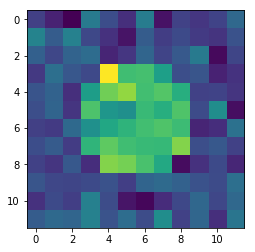

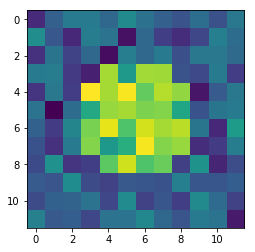

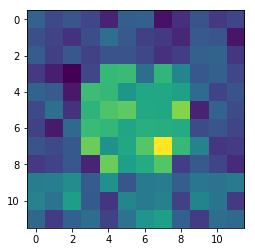

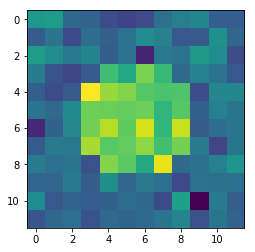

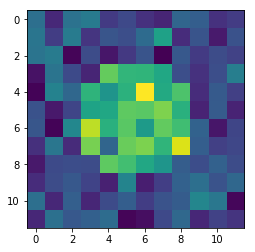

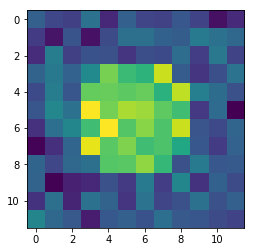

In [138]:
# for y_idx, y in enumerate(range(circle_rad*3, spotted_noisy_image.shape[1]- circle_rad * 4, circle_rad * 4)):
#     if y+circle_rad*2 > spotted_noisy_image.shape[1]:
#         break
#     for x_idx, x in enumerate(range(circle_rad*3, spotted_noisy_image.shape[0]-circle_rad*4, circle_rad * 4)):
#         if x+circle_rad*2 > spotted_noisy_image.shape[0]:
#             break
#         plt.imshow(spotted_noisy_image[x:x+circle_rad*4, y:y+circle_rad*4]); plt.show()